In [312]:
# importig required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 
from scipy.stats import pearsonr
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr

In [313]:
df = pd.read_csv("salary .csv")
df.shape

(514, 11)

### 1. Cleaning of data

* there are 514 observations in the given dataset with 11 features

In [314]:
# checking for null values
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### 2. Replacing null value with mean of salary

In [316]:
#Filling the missing values with the average

df_initial = df.fillna(df['salary'].mean())

df_initial.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### Removal of extreme values

In [317]:
q75_train, q25_train = np.percentile(df_initial['salary'], [75 ,25])
iqr_train = q75_train - q25_train
lower_train_bound = q25_train - iqr_train*1.5
upper_train_bound = q75_train + iqr_train*1.5
lower_train_bound
upper_train_bound

90765.625

In [318]:
df['Is_it_an_extreme'] = ['Yes' if i < lower_train_bound else 'Yes' if i > upper_train_bound else "No" for i in df_initial.salary]
df_outliers = df[df.Is_it_an_extreme == 'Yes']
df_outliers


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Is_it_an_extreme
280,91405.0,0,23,14,1.18,1,0,3,1,1,0,Yes
377,96156.0,20,12,12,1.19,1,0,3,1,1,2,Yes


* Linear regression is based on mostly parametric statistics like means, standard deviation and in this case correlation between salary earned and years of experience accrued. 

* Outliers who alter parametric statistics significantly would in turn alter predictions to be made.

* The outliers in question do not change the results desired from the model but does affect assumptions made about the dependant variable(salary_earned)

* The gradient of the regression model and the mean would be affected significantly enough to give reason for dropiing the values predictions derived from it would be sightly altered as 



##### * The extreme values should be dropped

#### Two outliers where found in the data-frame and where dropped as they were

In [319]:
# drop value with index 377
df_cleaned = df_initial.drop(377)
df_cleaned.shape

(513, 11)

In [320]:
# dropping extreme value at index 280
df_cleaned = df_cleaned.drop(280) 
df_cleaned.shape

(512, 11)

### 3. Splitting of Data

In [322]:
# splitting data to training set and test set
# 80/20 split
yrs_worked_train,yrs_worked_test,salary_earned_train,salary_earned_test = train_test_split(df_cleaned.yearsworked,df_cleaned.salary
                                                                                           ,test_size= 104/512)

### 4. Transforming Train and Test sets into dataframes

In [323]:
yrs_worked_train = pd.DataFrame(yrs_worked_train)
salary_earned_train = pd.DataFrame(salary_earned_train)
#creating a combined Data frame for train set
df_train = pd.concat([yrs_worked_train, salary_earned_train], axis=1).reindex(yrs_worked_train.index)

In [324]:
# creating a combined Data frame for test_set
df_test = pd.concat([yrs_worked_test, salary_earned_test], axis=1).reindex(yrs_worked_test.index)

### 5. Visialising the distribution of the dependant and indepedant variables



#### 5.1 A histogram showing the distribution of years worked

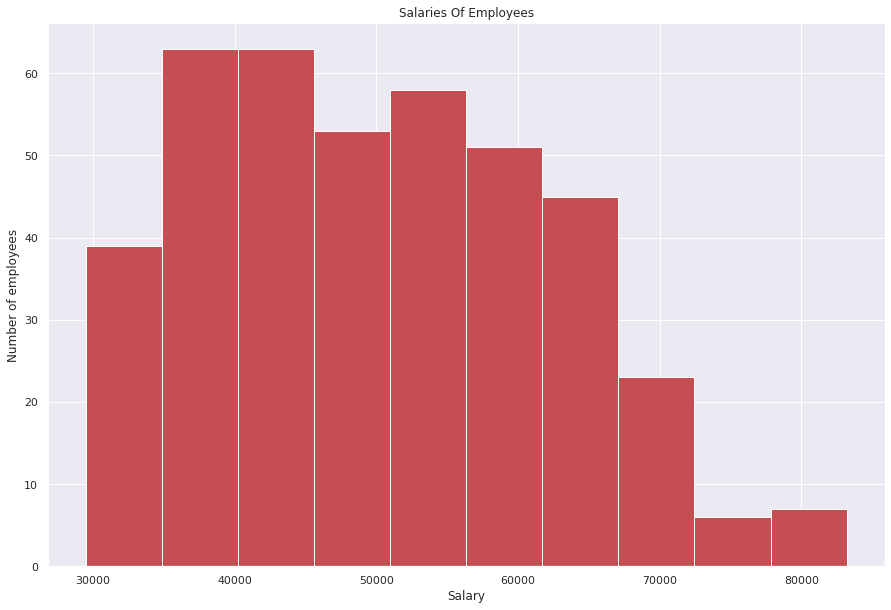

In [325]:
sns.set()
plt.figure(figsize=(15,10))
plt.hist(df_train['salary'], color='r', stacked=False, orientation='vertical')
plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.title('Salaries Of Employees')
plt.show()

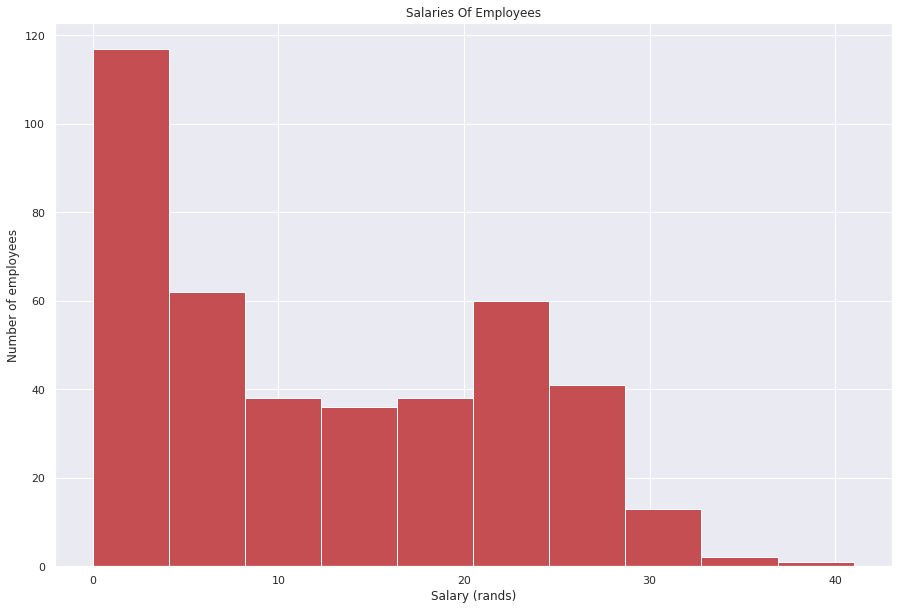

In [326]:
sns.set()
plt.figure(figsize=(15,10))
plt.hist(df_train['yearsworked'], color='r', stacked=False, orientation='vertical')
plt.xlabel('Salary (rands)')
plt.ylabel('Number of employees')
plt.title('Salaries Of Employees')
plt.show()

In [327]:
# basic stats of the dependant variable 
salary_earned_train.describe()


,salary
count,408.000000
mean,50392.524532
std,11990.842110
min,29500.000000
25%,40283.500000
50%,48931.000000
75%,59609.894535
max,83192.234380


In [328]:
yrs_worked_train.describe()

,yearsworked
count,408.000000
mean,12.683824
std,9.503680
min,0.000000
25%,4.000000
50%,11.000000
75%,21.000000
max,41.000000


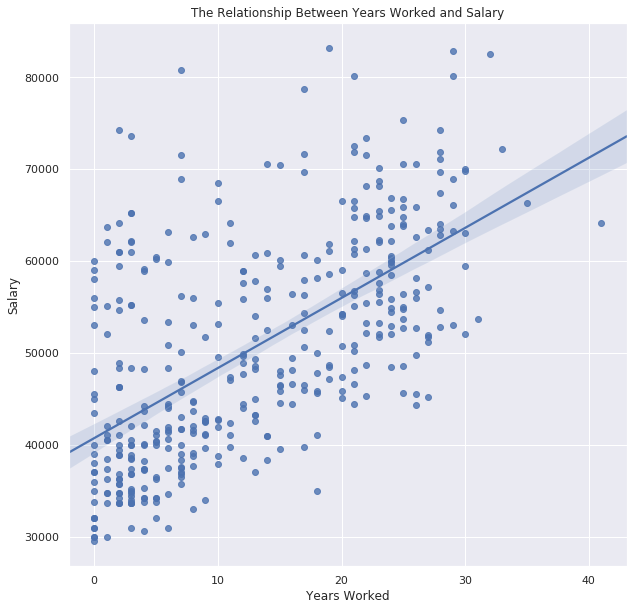

In [329]:
plt.figure(figsize=(10,10))
sns.regplot(x= df_train.yearsworked, y= df_train.salary, data=df)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('The Relationship Between Years Worked and Salary')
plt.show()

### Extreme points 

### Running a simple linear regression for salry

### Fitting Simple Linear Regression to the Training set


In [330]:

import statsmodels.formula.api as smf
# create a fitted model in one line
model = smf.ols(formula='salary ~ yearsworked', data=df_train).fit()
# print the coefficients
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.50e-42
Time:                        21:16:22   Log-Likelihood:                -4317.6
No. Observations:                 408   AIC:                             8639.
Df Residuals:                     406   BIC:                             8647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.072e+04    790.329     51.524      0.000    3.92e+04    4.23e+04
yearsworked   762.5420     49.887     15.285      0.000     664.472     860.612
==============================================================================
Omnibus:                       45.790   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.126
Skew:                           0.904   Prob(JB):                     2.39e-13
Kurtosis:                       3.391   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adding 1 year to the time worked results in the increase of salary earned

### Dertemining weather the model significantly predicts the dependant variable

In [334]:
df_cleaned.isnull().sum()
from scipy import stats

coef = stats.pearsonr(df_train['yearsworked'], df_train['salary'])

coef

(0.6043741465655816, 5.496775780415522e-42)

In [290]:
coeffs = pearsonr(df_train.yearsworked,df_train.salary)


ValueError: array must not contain infs or NaNs



* The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.

* The p_value is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of 0.05.

### Percentage of the variance in employees’ salaries that is accounted for by the number of years they have worked

In [ ]:
regressor.conf_int()

In [ ]:
# predicting the expected salary for someone with 12years' work experience 
regressor.predict([1,12])

In [ ]:
# predicting the expected salary for someone with 80 years work experience
regressor.predict([1,80])

In [ ]:
# #histogram
# sns.set()
# plt.figure(figsize=(15,10))
# plt.hist(yrs_worked_train, color= "r", stacked=False, orientation='vertical')
# plt.ylabel('Number of Employees ')
# plt.xlabel('Salary Earned')
# plt.title('Salary Earned for Train Set')
# plt.show()

In [ ]:
# creating a vector to predict the dependant variable Test set
# yrs_worked_predictor= regressor.predict(yrs_worked_test)
#

In [ ]:

tanza_data['Age_bins'] = pd.cut(x = tanza_data['Age'],bins= [10000, 19000, 29000, 39000, 49000, 59000, 69000, 79000, 89000, 99000, 109000, 119000])
plt.figure(figsize=(20,20))
sns.catplot(x='Age_bins',hue= 'mobile_money_classification', kind='count', data=tanza_data)